## Point Data

Here we are going to plot some markers on top of the maps we already made. We will use seismicity information since this is so readily available online (we use GeoJSON files from the [USGS site](http://earthquake.usgs.gov/earthquakes/search/) since these are easy to parse. Typically you have a limit on how many data to grab in each pass so if you want a global dataset you end up with fewer small events or a limited date range. I did this for a few places for you.


In [1]:
%pylab inline

import rasterio
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
import numpy


Populating the interactive namespace from numpy and matplotlib


In [8]:
base_projection     = ccrs.PlateCarree() 
global_extent     = [-180.0, 180.0, -90.0, 90.0]
globalmag         = rasterio.open("../../Data/Resources/EMAG2_image_V2.tif")
globalmag_img     = globalmag.read().transpose(1,2,0)
globalmarble      = rasterio.open("../../Data/Resources/BlueMarbleNG-TB_2004-06-01_rgb_3600x1800.TIFF")
globalmarble_img  = globalmarble.read().transpose(1,2,0)
globaletopo       = rasterio.open("../../Data/Resources/color_etopo1_ice_low.tif")
globaletopo_img   = globaletopo.read().transpose(1,2,0)
globaletopobw       = rasterio.open("../../Data/Resources/etopo1_grayscale_hillshade.tif")
globaletopobw_img   = globaletopobw.read(1)[::3,::3] / 256.0

In [3]:
# "Features" such as land, ocean, coastlines (50m =  the 1:50 million scale)

land = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                           edgecolor="green",
                           facecolor="white")

ocean = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',
                           edgecolor="green",
                           facecolor="blue")

coastline = cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                           edgecolor=(0.0,0.0,0.0),
                           facecolor="none")

# Add these to the plot object as
# ax.add_feature(coastline, linewidth=4, edgecolor=(1,0,1) zorder=1)
# and so forth. zorder is used to force the layering as required.

In [4]:
# Recent earthquake data (from static downloaded files)

import json

# 1 Global

earthquakes_datafile=open('../../Data/Resources/Earthquakes-2000-2014-5.5+.json')
earthquakes_data = json.load(earthquakes_datafile)
earthquakes_datafile.close()
earthquakes = earthquakes_data["features"]

# Now we have a dictionary of many, many events

eqlon = numpy.empty(len(earthquakes))
eqlat = numpy.empty(len(earthquakes))
eqdep = numpy.empty(len(earthquakes))
eqmag = numpy.empty(len(earthquakes))

for i,eq in enumerate(earthquakes):
    eqlon[i], eqlat[i], eqdep[i] = eq["geometry"]["coordinates"]
    eqmag[i] = eq["properties"]["mag"]

print ("Global depth range:     ", eqdep.min()," - ", eqdep.max())
print ("Global magnitude range: ", eqmag.min()," - ", eqmag.max())

    
# 2 Australian

earthquakes_datafile=open('../../Data/Resources/Earthquakes-AusRegion-2000-2014-4.8-5.5+.json')
earthquakes_data = json.load(earthquakes_datafile)
earthquakes_datafile.close()
earthquakes = earthquakes_data["features"]

# Now we have a dictionary of many, many events

ausqlon = numpy.empty(len(earthquakes))
ausqlat = numpy.empty(len(earthquakes))
ausqdep = numpy.empty(len(earthquakes))
ausqmag = numpy.empty(len(earthquakes))

for i, eq in enumerate(earthquakes):
    ausqlon[i], ausqlat[i], ausqdep[i] = eq["geometry"]["coordinates"]
    ausqmag[i] = eq["properties"]["mag"]
 
print ("Aus Region depth range:     ", ausqdep.min()," - ", ausqdep.max())
print ("Aus Region magnitude range: ", ausqmag.min()," - ", ausqmag.max())

#3 Japanese - Earthquakes-JapanRegion-2009-2014-4.5+.json

earthquakes_datafile=open('../../Data/Resources/Earthquakes-JapanRegion-2009-2014-4.5+.json')
earthquakes_data = json.load(earthquakes_datafile)
earthquakes_datafile.close()
earthquakes = earthquakes_data["features"]

#3+ South of 30 degrees: Earthquakes-IBMRegion-1990-2014-3+.json

earthquakes_datafile=open('../../Data/Resources/Earthquakes-IBMRegion-1990-2014-3+.json')
earthquakes_data = json.load(earthquakes_datafile)
earthquakes_datafile.close()

earthquakes.extend(earthquakes_data["features"])

jpqlon = numpy.empty(len(earthquakes))
jpqlat = numpy.empty(len(earthquakes))
jpqdep = numpy.empty(len(earthquakes))
jpqmag = numpy.empty(len(earthquakes))

for i, eq in enumerate(earthquakes):
    jpqlon[i], jpqlat[i], jpqdep[i] = eq["geometry"]["coordinates"]
    jpqmag[i] = eq["properties"]["mag"]
    
    
print ("Japan Region depth range:     ", jpqdep.min()," - ", jpqdep.max())
print ("Japan Region magnitude range: ", jpqmag.min()," - ", jpqmag.max())

    
norm_eqdep = matplotlib.colors.Normalize(vmin = 0.0, vmax = 200, clip = False)

#4 Yakutat EQ


earthquakes_datafile=open('../../Data/Resources/Earthquakes-YakutatRegion-1990-2014-3+.json')
earthquakes_data = json.load(earthquakes_datafile)
earthquakes_datafile.close()
earthquakes = earthquakes_data["features"]
 
yakqlon = numpy.empty(len(earthquakes))
yakqlat = numpy.empty(len(earthquakes))
yakqdep = numpy.empty(len(earthquakes))
yakqmag = numpy.empty(len(earthquakes))

for i, eq in enumerate(earthquakes):
    yakqlon[i], yakqlat[i], yakqdep[i] = eq["geometry"]["coordinates"]
    yakqmag[i] = eq["properties"]["mag"]


print ("Yakutat Region depth range:     ", yakqdep.min()," - ", yakqdep.max())
print ("Yakutat Region magnitude range: ", yakqmag.min()," - ", yakqmag.max())

earthquakes_datafile=open('../../Data/Resources/Earthquakes-MeditRegion-1990-2014-3+.json')
earthquakes_data = json.load(earthquakes_datafile)
earthquakes_datafile.close()
earthquakes = earthquakes_data["features"]

itqlon = numpy.empty(len(earthquakes))
itqlat = numpy.empty(len(earthquakes))
itqdep = numpy.empty(len(earthquakes))
itqmag = numpy.empty(len(earthquakes))

for i, eq in enumerate(earthquakes):
    itqlon[i], itqlat[i], itqdep[i] = eq["geometry"]["coordinates"]
    itqmag[i] = eq["properties"]["mag"]

    
print ("Vatican Region depth range:     ", itqdep.min()," - ", itqdep.max())
print ("Vatican Region magnitude range: ", itqmag.min()," - ", itqmag.max())


Global depth range:      0.0  -  691.6
Global magnitude range:  5.5  -  9.1
Aus Region depth range:      0.0  -  678.0
Aus Region magnitude range:  4.8  -  5.5
Japan Region depth range:      0.0  -  656.9
Japan Region magnitude range:  3.0  -  9.0
Yakutat Region depth range:      -4.8  -  218.9
Yakutat Region magnitude range:  nan  -  nan
Vatican Region depth range:      0.0  -  522.0
Vatican Region magnitude range:  3.5  -  7.6


### Plotting points

We add the points to the map using the usual plotting tools from matplotlib plus the transformation argument

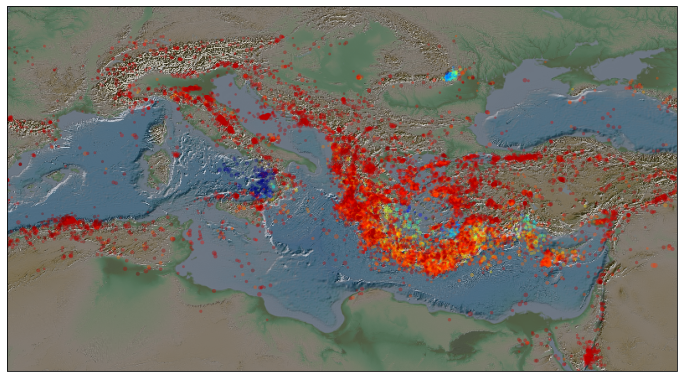

In [9]:
projection = ccrs.PlateCarree()

fig = plt.figure(figsize=(12, 12), facecolor="none")
ax = plt.axes(projection=projection)
ax.set_extent([0, 40, 28, 48])

#ax.add_feature(land, edgecolor="black", alpha=0.1, linewidth=2)
ax.add_feature(ocean, alpha=0.1, zorder=1)

ax.imshow(globaletopo_img, origin='upper', transform=base_projection, extent=global_extent)
ax.imshow(globaletopobw_img, origin='upper', cmap=mpl.cm.Greys, transform=base_projection, extent=global_extent, alpha=0.75, zorder=1)

plt.scatter(itqlon, itqlat, c=itqdep, cmap=mpl.cm.jet_r, norm=norm_eqdep, linewidth=0, 
            s=(itqmag-3.0)*10, transform=ccrs.PlateCarree(), alpha=0.333, zorder=2)

plt.show()


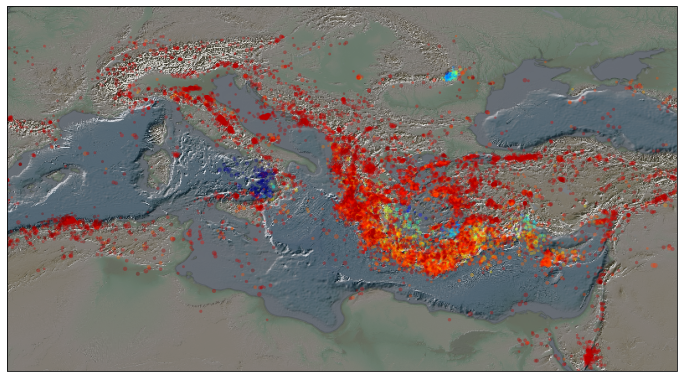

In [10]:
# Italy / Mediterranean earthquakes


projection = ccrs.PlateCarree()

fig = plt.figure(figsize=(12, 12), facecolor="none")
ax = plt.axes(projection=projection)
ax.set_extent([0, 40, 28, 48])

ax.add_feature(land, edgecolor="black", alpha=0.1, linewidth=2)
ax.add_feature(ocean, alpha=0.1, zorder=1)

ax.imshow(globaletopo_img, origin='upper', transform=base_projection, extent=global_extent)
ax.imshow(globaletopobw_img, origin='upper', cmap=mpl.cm.Greys, transform=base_projection, extent=global_extent, alpha=0.85, zorder=1)

plt.scatter(itqlon, itqlat, c=itqdep, cmap=mpl.cm.jet_r, norm=norm_eqdep, linewidth=0, 
            s=(itqmag-3.0)*10, transform=ccrs.PlateCarree(), alpha=0.333, zorder=2)


plt.savefig("ItaliaEq.png")

plt.show()



In [11]:
# Seafloor age data and global image - data from Earthbyters

datasize = (1801, 3601, 3)
age_data = np.empty(datasize)

ages = np.load("../../Data/Resources/global_age_data.3.6.z.npz")["ageData"]

lats = np.linspace(90, -90, datasize[0])
lons = np.linspace(-180.0,180.0, datasize[1])

arrlons,arrlats = np.meshgrid(lons, lats)

age_data[...,0] = arrlons[...]
age_data[...,1] = arrlats[...]
age_data[...,2] = ages[...]



/tmp/ipykernel_16117/3656653161.py:29: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("GlobalAgeMapEq.png", dpi=600, frameon=False, edgecolor="none", facecolor="none", bbox_inches='tight', pad_inches=0.0)


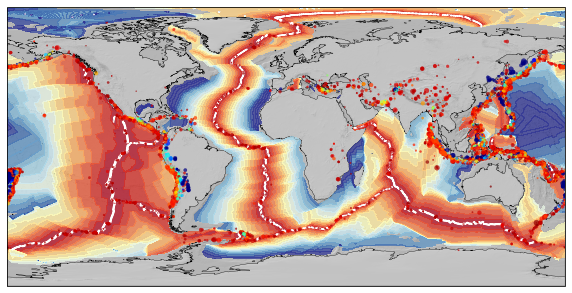

In [12]:
# Global


projection = ccrs.PlateCarree()
bg_projection = ccrs.PlateCarree()


fig = plt.figure(figsize=(10, 10), facecolor="none", edgecolor="none")

ax = plt.axes(projection=projection)
ax.set_extent(global_extent)

ax.add_feature(land, edgecolor="black", alpha=0.2, linewidth=0.25)
# ax.add_feature(ocean, alpha=0.1, zorder=1)
ax.add_feature(coastline, alpha=1.0, linewidth=0.33)

ax.imshow(globaletopobw_img, origin='upper', transform=base_projection, extent=global_extent, zorder=0, cmap="gray")

cf = contourf(age_data[:,:,0], age_data[:,:,1], age_data[:,:,2], 
         levels = arange(0.5,250,10), vmin=0, vmax=150,
         transform=base_projection,  cmap="RdYlBu",zorder=2, alpha=0.75)

contour(age_data[:,:,0], age_data[:,:,1], age_data[:,:,2], levels = (0.1,0.5), colors="white", transform=base_projection)


plt.scatter(eqlon, eqlat, c=eqdep, cmap=mpl.cm.jet_r, norm=norm_eqdep, linewidth=0.33, 
            s=(eqmag-5.5)*10, transform=ccrs.PlateCarree(), alpha=0.7, zorder=2)

plt.savefig("GlobalAgeMapEq.png", dpi=600, frameon=False, edgecolor="none", facecolor="none", bbox_inches='tight', pad_inches=0.0)





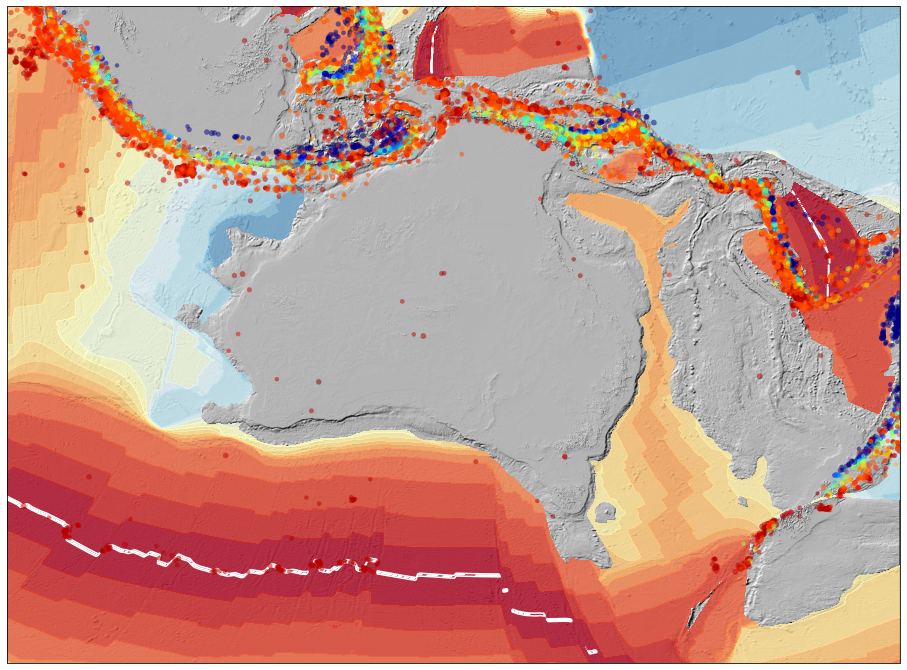

In [13]:
projection = ccrs.PlateCarree()

fig = plt.figure(figsize=(16, 16), facecolor="none")
ax = plt.axes(projection=projection)
ax.set_extent([90, 180, -50, 5])
# ax.add_feature(ocean, facecolor=(0.4,0.4,0.6), edgecolor="none", linewidth=5, alpha=0.40, zorder=1)
ax.imshow(globaletopobw_img, origin='upper', transform=base_projection, extent=global_extent, zorder=0, cmap="gray")

contourf(age_data[:,:,0], age_data[:,:,1], age_data[:,:,2], levels = arange(0,200,10), 
         transform=base_projection,  cmap="RdYlBu",zorder=2, alpha=0.8)

contour(age_data[:,:,0], age_data[:,:,1], age_data[:,:,2], levels = (0.1,0.5), colors="white", transform=base_projection)


plt.scatter(ausqlon, ausqlat, c=ausqdep, cmap=mpl.cm.jet_r, norm=norm_eqdep, linewidth=0, 
            s=(ausqmag-4.0)*25, transform=ccrs.PlateCarree(), alpha=0.5, zorder=3)


plt.show()

The plotting of lines is actually a bit more interesting since the tranformation machinery needs to work on all the points between the given end points. We have seen lines and fills in the contouring but it is interesting to see what is actually going on (this is one of the standard examples from cartopy).

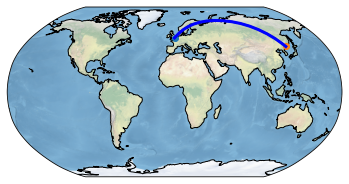

In [14]:
ax = plt.axes(projection=ccrs.Robinson())

# ax = plt.axes(projection=ccrs.LambertCylindrical())

    # make the map global rather than have it zoom in to
    # the extents of any plotted data
    
ax.set_global()
ax.coastlines() 
ax.stock_img()

plt.plot(-0.08, 51.53, 'o', transform=ccrs.PlateCarree())
plt.plot(132 , 43.17,  'o', transform=ccrs.PlateCarree())
plt.plot([-0.08, 132], [51.53, 43.17], 
         transform=ccrs.Geodetic(), color="Green", linewidth=2)
plt.plot([-0.08, 132], [51.53, 43.17], 
         transform=ccrs.Geodetic(), color="Blue", linewidth=3)



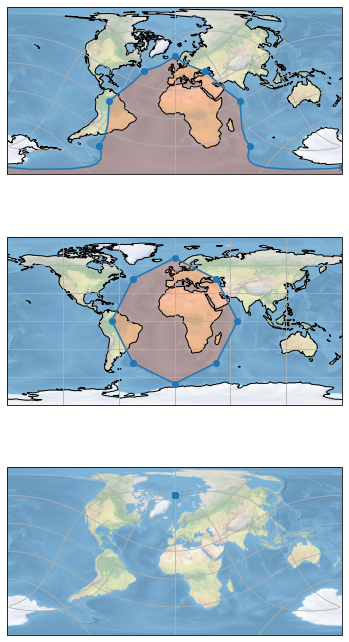

In [16]:
# Examples of projections and how to draw/fill a shape 

# Inside out / outside in is defined by cw/ccw ordering of points in the filled shape

rotated_pole = ccrs.RotatedPole(pole_latitude=60, pole_longitude=180)

scale = 45
x = [-scale, -scale*1.5, -scale, 0.0,   scale, scale*1.5,  scale, 0.0,   -scale]
y = [-scale, 0.0,     scale, scale * 1.5, scale, 0.0,   -scale, -scale*1.5, -scale]

xx = x[::-1]
yy = y[::-1]

fig = plt.figure(figsize=(6, 12))

ax = plt.subplot(311, projection=rotated_pole)
ax.stock_img()
ax.coastlines()
ax.plot(x, y, marker='o', transform=ccrs.PlateCarree())
ax.fill(x, y, color='coral', transform=ccrs.PlateCarree(), alpha=0.4)
ax.gridlines()

ax = plt.subplot(312, projection=ccrs.PlateCarree())
ax.stock_img()
ax.coastlines()
ax.plot(x, y, marker='o', transform=ccrs.PlateCarree())
ax.fill(x, y, transform=ccrs.PlateCarree(), color='coral', alpha=0.4, closed=True)
ax.gridlines()

ax = plt.subplot(313, projection=rotated_pole)
ax.stock_img()
# ax.coastlines()
ax.plot(x, y, marker='o', transform=ccrs.Geocentric())
ax.fill(xx, yy,  color='coral', alpha=0.4, transform=ccrs.Geocentric())
ax.gridlines()
plt.show()


